In [79]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [80]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data = pd.read_csv('/drive/MyDrive/Colab Notebooks/데이터(+1일)_fianl_true_all.csv')
df = data.copy()

# 전처리

In [81]:
Air_Polution = df.dropna(axis=0)  # null행 날리기 

Air_Polution = Air_Polution.drop(["date"], axis = 1)
Air_Polution.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95752 entries, 40 to 121775
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   seoul           95752 non-null  float64
 1   beijing         95752 non-null  float64
 2   qingdao         95752 non-null  float64
 3   tianjin         95752 non-null  float64
 4   hangzhou        95752 non-null  float64
 5   chengdu         95752 non-null  float64
 6   suzhou          95752 non-null  float64
 7   wuhan           95752 non-null  float64
 8   shaghai         95752 non-null  float64
 9   chongqing       95752 non-null  float64
 10  nanjing         95752 non-null  float64
 11  windspeed       95752 non-null  float64
 12  windspeed+1     95752 non-null  float64
 13  temperatures    95752 non-null  float64
 14  humidity        95752 non-null  float64
 15  temperatures+1  95752 non-null  float64
 16  humidity+1      95752 non-null  float64
dtypes: float64(17)
memory usage: 

In [82]:
from scipy import stats
z = np.abs(stats.zscore(Air_Polution))

In [83]:
Air_Polution_outlier = Air_Polution[(z >= 3.0).any(axis=1)]
Air_Polution_delete_outlier = Air_Polution[(z < 3).all(axis=1)]
Air_Polution.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95752 entries, 40 to 121775
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   seoul           95752 non-null  float64
 1   beijing         95752 non-null  float64
 2   qingdao         95752 non-null  float64
 3   tianjin         95752 non-null  float64
 4   hangzhou        95752 non-null  float64
 5   chengdu         95752 non-null  float64
 6   suzhou          95752 non-null  float64
 7   wuhan           95752 non-null  float64
 8   shaghai         95752 non-null  float64
 9   chongqing       95752 non-null  float64
 10  nanjing         95752 non-null  float64
 11  windspeed       95752 non-null  float64
 12  windspeed+1     95752 non-null  float64
 13  temperatures    95752 non-null  float64
 14  humidity        95752 non-null  float64
 15  temperatures+1  95752 non-null  float64
 16  humidity+1      95752 non-null  float64
dtypes: float64(17)
memory usage: 

In [84]:
Air_Polution.describe()

,seoul,beijing,qingdao,tianjin,hangzhou,chengdu,suzhou,wuhan,shaghai,chongqing,nanjing,windspeed,windspeed+1,temperatures,humidity,temperatures+1,humidity+1
count,95752.00000,95752.000000,95752.000000,95752.000000,95752.000000,95752.000000,95752.000000,95752.000000,95752.000000,95752.000000,95752.000000,95752.00000,95752.000000,95752.000000,95752.000000,95752.000000,95752.000000
mean,42.68245,46.760109,69.805059,73.702283,66.242992,63.944314,64.034830,72.344348,46.760109,62.891919,68.364274,2.36793,2.366624,14.048124,60.907793,14.045273,60.931887
std,26.96943,20.719536,39.040853,47.967602,27.972154,35.748926,27.450725,36.990322,20.719536,26.390988,34.405205,0.82138,0.822262,10.244387,15.151668,10.253586,15.127983
min,3.00000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,13.000000,5.000000,1.00000,1.000000,-15.000000,22.000000,-15.000000,22.000000
25%,25.00000,32.000000,46.000000,47.000000,47.000000,41.000000,45.000000,49.000000,32.000000,45.000000,46.000000,2.00000,2.000000,6.000000,49.000000,6.000000,49.000000
50%,38.00000,43.000000,64.000000,64.000000,62.000000,58.000000,60.000000,66.000000,43.000000,59.000000,62.000000,2.00000,2.000000,15.000000,61.000000,15.000000,61.000000
75%,54.00000,58.000000,85.000000,88.000000,82.000000,80.000000,76.000000,89.000000,58.000000,76.000000,83.000000,3.00000,3.000000,23.000000,71.000000,23.000000,71.000000
max,709.00000,164.000000,390.000000,607.000000,239.000000,451.000000,265.000000,582.000000,164.000000,226.000000,345.000000,6.00000,6.000000,34.000000,100.000000,34.000000,100.000000


In [85]:
Air_Polution_outlier.describe()

,seoul,beijing,qingdao,tianjin,hangzhou,chengdu,suzhou,wuhan,shaghai,chongqing,nanjing,windspeed,windspeed+1,temperatures,humidity,temperatures+1,humidity+1
count,10134.000000,10134.000000,10134.000000,10134.000000,10134.000000,10134.000000,10134.00000,10134.000000,10134.000000,10134.000000,10134.000000,10134.000000,10134.000000,10134.000000,10134.000000,10134.000000,10134.000000
mean,63.351293,66.218966,118.464377,130.871719,92.875469,102.670318,95.15670,111.784981,66.218966,91.629663,111.853069,2.920170,2.987764,8.873693,59.631537,8.973160,59.874581
std,50.177924,30.465566,67.434910,92.846597,39.007851,58.730154,43.61571,61.793581,30.465566,38.979617,58.130493,1.190293,1.218807,8.962207,15.451277,8.782023,15.509778
min,3.000000,10.000000,1.000000,20.000000,10.000000,0.000000,12.00000,12.000000,10.000000,22.000000,16.000000,1.000000,1.000000,-9.000000,26.000000,-10.000000,26.000000
25%,36.000000,45.000000,72.000000,71.250000,64.000000,65.000000,66.00000,67.000000,45.000000,60.000000,75.000000,2.000000,2.000000,2.000000,48.000000,2.000000,48.000000
50%,52.000000,59.000000,101.000000,106.000000,88.000000,90.000000,84.00000,101.000000,59.000000,82.000000,103.000000,3.000000,3.000000,8.000000,60.000000,8.000000,59.000000
75%,74.000000,83.000000,152.000000,156.000000,117.000000,123.000000,118.00000,143.000000,83.000000,119.000000,132.000000,3.000000,4.000000,15.000000,69.000000,15.000000,70.000000
max,709.000000,164.000000,390.000000,607.000000,239.000000,451.000000,265.00000,582.000000,164.000000,226.000000,345.000000,6.000000,6.000000,30.000000,96.000000,28.000000,98.000000


In [86]:
X = Air_Polution.drop(["seoul"], axis = 1)
y = Air_Polution[["seoul"]] #label = seoul

In [87]:
X['beijing'] = pd.to_numeric(X['beijing'], errors='coerce')
X['qingdao'] = pd.to_numeric(X['qingdao'], errors='coerce')
X['tianjin'] = pd.to_numeric(X['tianjin'], errors='coerce')

X['hangzhou'] = pd.to_numeric(X['hangzhou'], errors='coerce')
X['suzhou'] = pd.to_numeric(X['suzhou'], errors='coerce')
X['chengdu'] = pd.to_numeric(X['chengdu'], errors='coerce')
X['wuhan'] = pd.to_numeric(X['wuhan'], errors='coerce')
X['shaghai'] = pd.to_numeric(X['shaghai'], errors='coerce')
X['chongqing'] = pd.to_numeric(X['chongqing'], errors='coerce')
X['nanjing'] = pd.to_numeric(X['nanjing'], errors='coerce')

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

randomState = 42
X, y = shuffle(X, y, random_state=randomState)

X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(X, y, test_size= 0.2, random_state=randomState)
# test set 나누기

In [89]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(X_train_set.astype(np.float64))

X_train_scaled = std_scaler.transform(X_train_set.astype(np.float64))
#standardization 쓸꺼면 이거

# learning curves

In [90]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=randomState)
    train_errors, val_errors = [], []
    for m in range(1, (len(X_train) + 1) // 1000):
        tempM = m * 1000
        model.fit(X_train[:tempM], y_train[:tempM])
        y_train_predict = model.predict(X_train[:tempM])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:tempM], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size / 1000", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

# 학습 시작

DecisionTreeRegressor(random_state=42)

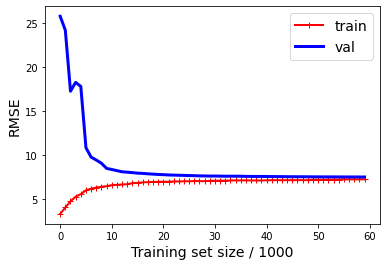

In [91]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=randomState)

plot_learning_curves(tree_reg, X_train_scaled, y_train_set)

tree_reg.fit(X_train_scaled, y_train_set)

In [92]:
tree_reg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [93]:
tree_reg.get_n_leaves()

2272

In [94]:
tree_reg.get_depth()

26

In [95]:
'''
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_reg, feature_names=X.feature_names, filled=True)
fig.savefig("/drive/MyDrive/decistion_tree.png")
'''

'\nfrom sklearn import tree\nfig = plt.figure(figsize=(25,20))\n_ = tree.plot_tree(tree_reg, feature_names=X.feature_names, filled=True)\nfig.savefig("/drive/MyDrive/decistion_tree.png")\n'

In [104]:
X_train_set.dtypes

beijing           float64
qingdao           float64
tianjin           float64
hangzhou          float64
chengdu           float64
suzhou            float64
wuhan             float64
shaghai           float64
chongqing         float64
nanjing           float64
windspeed         float64
windspeed+1       float64
temperatures      float64
humidity          float64
temperatures+1    float64
humidity+1        float64
dtype: object

In [97]:
tree_reg.feature_importances_

array([0.02553695, 0.11935157, 0.18271615, 0.03774723, 0.18399283,
       0.03884643, 0.05098748, 0.02465085, 0.05447033, 0.07237465,
       0.01966273, 0.00789651, 0.0436039 , 0.0325234 , 0.03429309,
       0.0713459 ])

# 테스트



In [98]:
X_test_scaled = std_scaler.transform(X_test_set.astype(np.float64))

## Decision tree 테스트

In [99]:
final_predictions = tree_reg.predict(X_test_scaled)
final_mse = mean_squared_error(y_test_set, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

7.27638199766032

# 실험

In [100]:
test = pd.read_csv('/drive/MyDrive/Colab Notebooks/test(+1일)_final.csv')

Air_Polution_t = test.dropna(axis=0)  # null행 날리기 

Air_Polution_t = Air_Polution_t.drop(["date"], axis = 1)  # date 열 지우기(단순 날짜이기에)
X_exp = Air_Polution_t.drop(["seoul"], axis = 1) # feature 분리
y_exp= Air_Polution_t[["seoul"]] #label = seoul

In [101]:
X_exp['beijing'] = pd.to_numeric(X_exp['beijing'], errors='coerce')
X_exp['qingdao'] = pd.to_numeric(X_exp['qingdao'], errors='coerce')
X_exp['tianjin'] = pd.to_numeric(X_exp['tianjin'], errors='coerce')

In [102]:
'''
X_prepared = std_scaler.transform(X_exp.astype(np.float64))
final_predictions = tree_reg.predict(X_prepared)

final_mse = mean_squared_error(y_exp, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse
'''

'\nX_prepared = std_scaler.transform(X_exp.astype(np.float64))\nfinal_predictions = tree_reg.predict(X_prepared)\n\nfinal_mse = mean_squared_error(y_exp, final_predictions)\nfinal_rmse = np.sqrt(final_mse)\nfinal_rmse\n'

In [103]:
# tree_reg.predict(X_prepared)